<a href="https://colab.research.google.com/github/tackulus/229352/blob/main/Lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Lab 01**

---

> **229352 Statistical Learning for Data Science 2**

> **Kasidis Torcharoen (610510531)**

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn import datasets
mnist = datasets.load_digits()

**1.  Split the data into training, validation and test sets.**

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X = scaler.fit_transform(mnist.data)
y = mnist.target
X_train, X_test, y_train, y_test \
    = train_test_split(X, y, test_size=0.25, random_state=0)

**2.  Train a k-nearest neighbor (kNN) model with the training set.  Then use the validation set to find the best value of k and the best distance metric. You can also use the cross-validation instead of the validation set.  In that case, you might want to take a look at *sklearn.model_selection.GridSearchCV*.**

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
parameters = {"n_neighbors": range(1,11), 
              "metric": ["minkowski"],
              "p": range(1,4)}
knn_best = GridSearchCV(knn, parameters, cv=5)
knn_best.fit(X_train,y_train)
knn_best.best_params_

{'metric': 'minkowski', 'n_neighbors': 3, 'p': 1}

**3.  Report the test accuracy of the kNN model with the value of k and the distance metric obtained above.**

In [5]:
knn_best.score(X_test, y_test)

0.98

**4.  Show at least two images that the model mis-classifies.  For both images, what are the actual numbers and what are the model’s predictions?**

In [6]:
preds = knn_best.predict(X)
answer = np.equal(preds, y)
mis_indexs = [i for i,u in enumerate(answer) if not u]

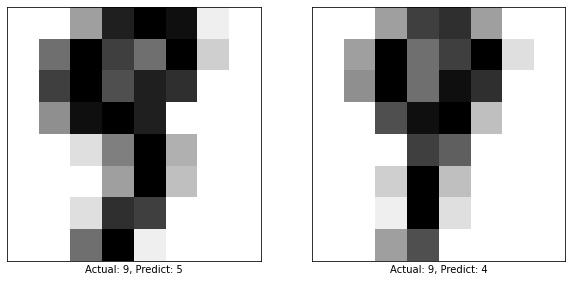

In [7]:
import random as rnd
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
index = rnd.sample(mis_indexs, 2)
for i,j in enumerate(index):
    plt.subplot(1, 2, i+1)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
    plt.imshow(mnist.images[j], cmap="binary")
    plt.xlabel(f"Actual: {y[j]}, Predict: {preds[j]}")
plt.show()

In [8]:
%%shell
jupyter nbconvert --to html /content/Lab01.ipynb

[NbConvertApp] Converting notebook /content/Lab01.ipynb to html
[NbConvertApp] Writing 290131 bytes to /content/Lab01.html
